### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [225]:
data = pd.read_csv('data/coupons.csv')

In [226]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

## 1. Data Cleaning:
   - Droped Car column, since it contains 99% of missing values.
   - Removed "()" from passanger column, i.e. Kid(s) to Kids
   - Changed type of Y column from Int64 to String for better plotting¶
   - After cleaning, the final dataset has 12079 entries, 25 columns

In [227]:
# Original dataset contains 26 columns and 12684 entries. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [228]:
# Found Car columns has 99% of missing values, decided to drop this column
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [229]:
# Drop the car column and drop rows with missing values 
data = data.drop('car', axis=1).dropna()
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1


In [230]:
# Check count values for passanger column
data['passanger'].value_counts()

passanger
Alone        6969
Friend(s)    3148
Partner      1024
Kid(s)        938
Name: count, dtype: int64

In [231]:
# Passanger column contains parentheses， decided to remove them to make strings more readable.
data['passanger'] = data['passanger'].str.replace('(','').str.replace(')','')

In [232]:
# New passanger column
data['passanger'].value_counts()

passanger
Alone      6969
Friends    3148
Partner    1024
Kids        938
Name: count, dtype: int64

In [233]:
# Change type of Y from Int to String
data = data.astype({"Y": str})

In [234]:
# The final dataset contains 25 columns and 12079 entries
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [239]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friends,Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friends,Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


## 2. Code and Visulizations:

#### 1). What proportion of the total observations chose to accept the coupon?
   - 57% of total observations chose to accept the coupon, which is slighter higher than random
   - Need to figure out which segmentaion has the highest acceptance rate



In [240]:
data.Y.value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

<Axes: >

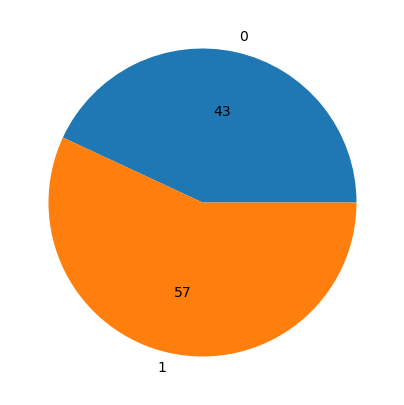

In [241]:
data.groupby('Y').size().plot.pie(autopct = "%.0f", figsize = (5,5))


#### 2). Use a bar plot to visualize the `coupon` column
    - Average Coupon giveaways is at around 2.5K
    - Coupon amount is at around 1.5K to 3.7K for each type

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Countplot for overall Coupon distribution')

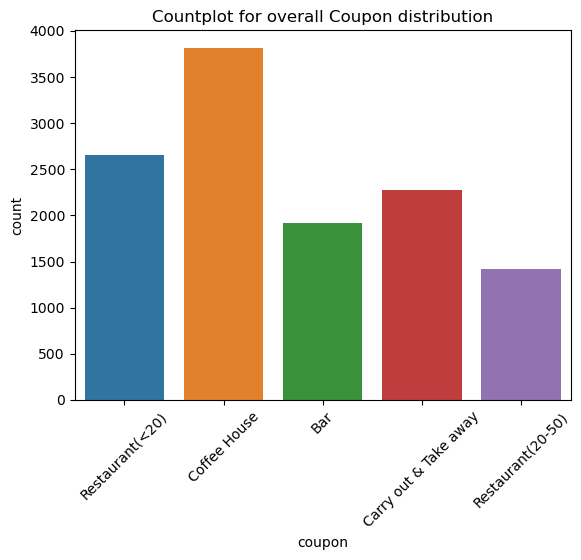

In [242]:
sns.countplot(data, x = 'coupon')
plt.xticks(rotation = 45)
plt.title("Countplot for overall Coupon distribution")


#### 3). Is there any difference for coupon acceptance for each type of coupon?
   - Restaurant(<20) and Carryout&Takeaway coupons have significant higher acceptance rate (vs non-acceptance rate)
   - Restaurant(20-50) and bar coupons have slightly lower acceptance rate (vs non-acceptance rate)
   - No noticeable diffs for Coffee coupons


/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Histogram of Coupon categories by Acceptance')

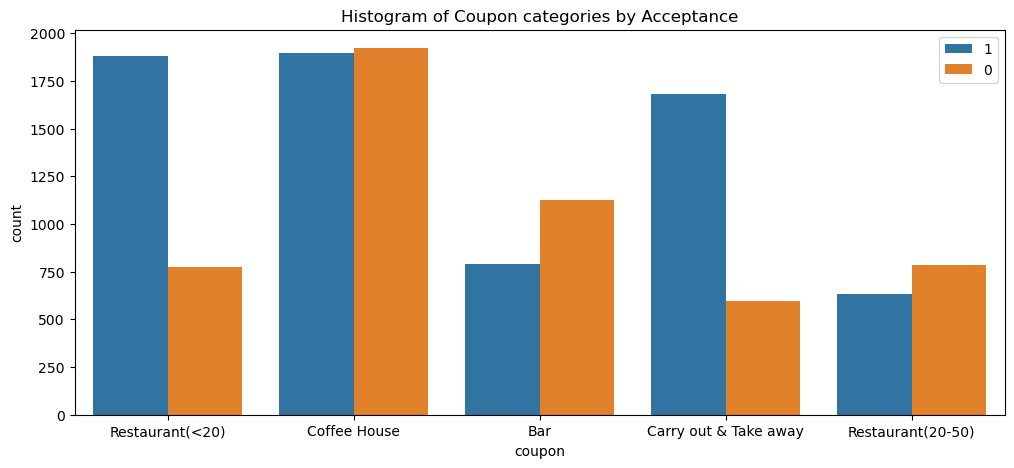

In [243]:
plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(data, x = 'coupon', hue = 'Y')
# plt.xticks(rotation = 45)
plt.legend()
plt.title('Histogram of Coupon categories by Acceptance')

 #### 4). Use a histogram to visualize the temperature column?
   - For all 3 temperature groups, the acceptance rate is higher than non-acceptance rate.
   - When T = 80, the accptance rate is relatively higher (vs T = 30 or 55)

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Histogram of Temperature categories by Acceptance')

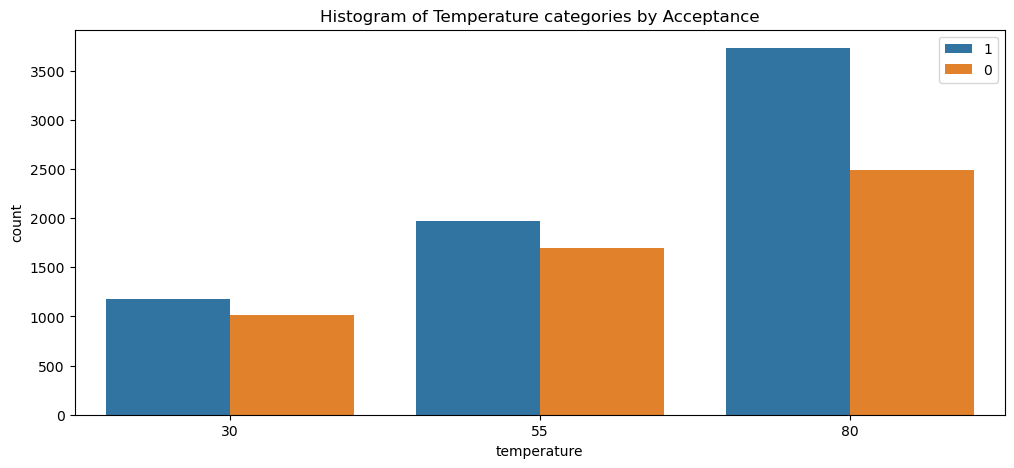

In [244]:
plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(data, x = 'temperature', hue = 'Y')
# plt.xticks(rotation = 45)
plt.legend()
plt.title('Histogram of Temperature categories by Acceptance')

**Investigating the Bar Coupons**





Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

In [246]:
data_bar = data[data['coupon'] == 'Bar']
data_bar.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kids,Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,1
90,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


2. What proportion of bar coupons were accepted?


/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/qkong/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Y', ylabel='count'>

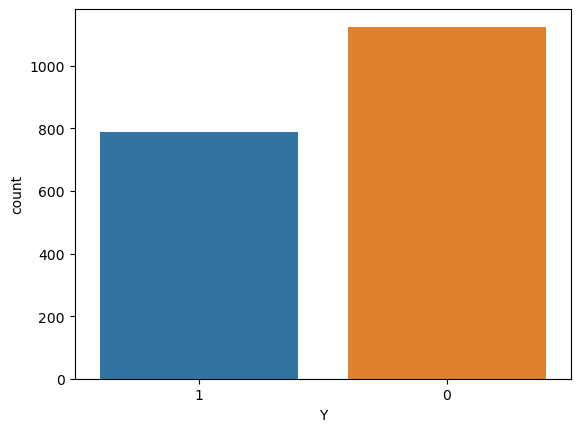

In [247]:
sns.countplot(data_bar, x = 'Y')

<Axes: >

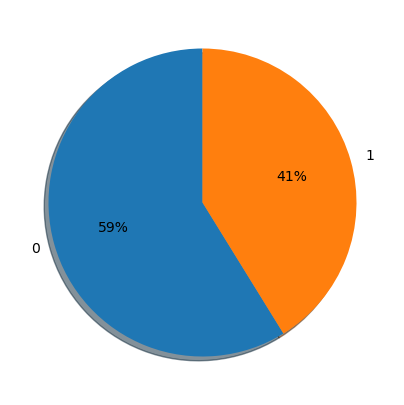

In [248]:
data_bar.groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5), shadow=True, startangle=90)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [249]:
data_bar.Bar.value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [250]:
fewer_times = ['never', 'less1', '1~3']
more_times = ['4~8', 'gt8']
morethanonce = ['1~3', '4~8', 'gt8']

<Axes: >

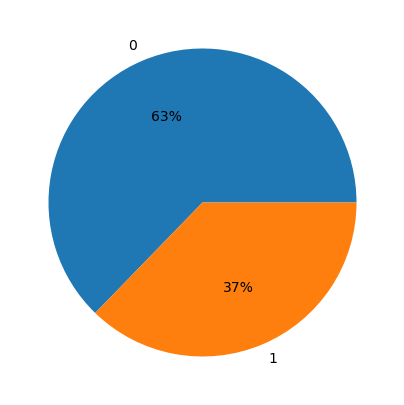

In [252]:
data_bar.query('Bar in @fewer_times').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

<Axes: >

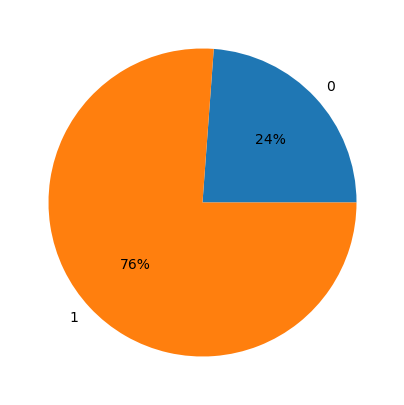

In [253]:
data_bar.query('Bar in @more_times').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: >

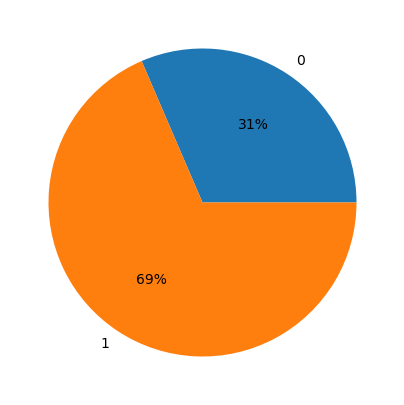

In [254]:
data_bar.query('Bar in @morethanonce').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

In [255]:
data.age.value_counts().sort_values()

age
below21     504
46          664
41         1065
36         1253
50plus     1732
31         1925
26         2399
21         2537
Name: count, dtype: int64

In [256]:
below25 = ['below21', '21']
above25 = ['46', '41', '36', '50plus', '31', '26']
under30 = ['below21', '21', '26']

<Axes: >

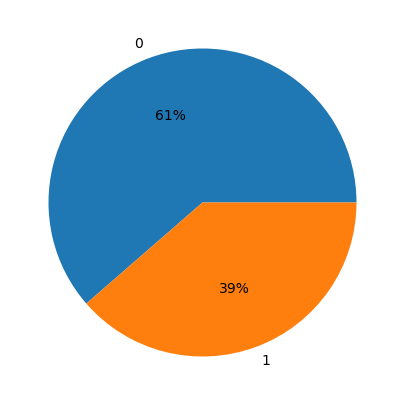

In [258]:
data_bar.query('age in @above25').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [141]:
data_bar.passanger.value_counts()

passanger
Alone      1141
Friends     318
Partner     260
Kids        194
Name: count, dtype: int64

<Axes: >

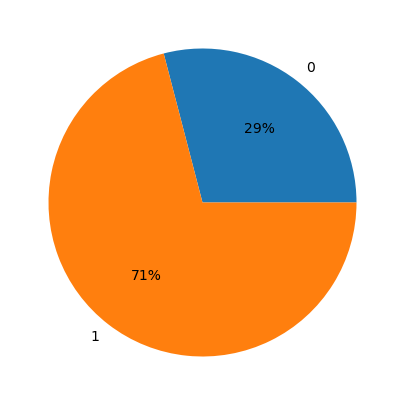

In [259]:
data_bar.query('(Bar in @morethanonce) and (passanger != "Kids")').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

<Axes: >

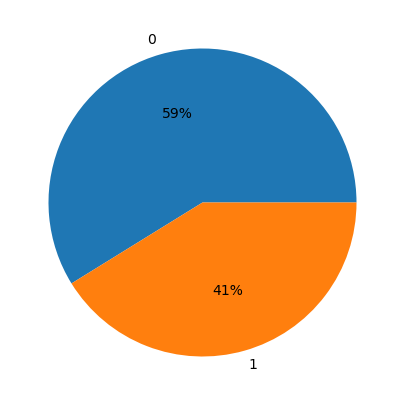

In [260]:
data_bar.query('occupation not in ["farming", "fishing", "forestry"]').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [148]:
data_bar.maritalStatus.value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

<Axes: >

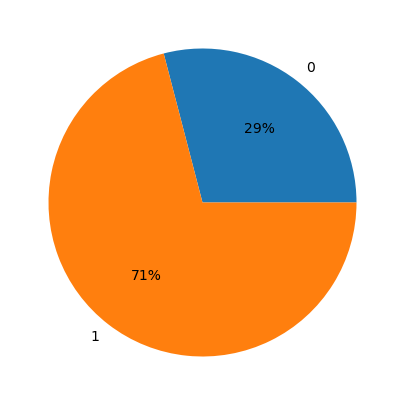

In [261]:
data_bar.query('(Bar in @morethanonce) and (passanger != "Kids") and (maritalStatus != "Widowed")').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

<Axes: >

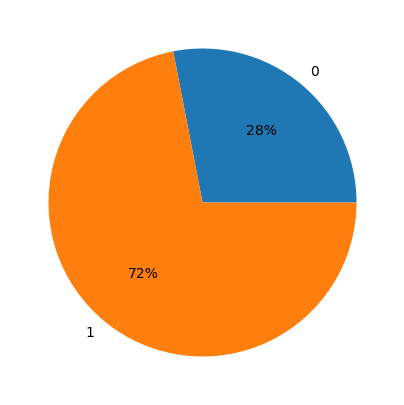

In [262]:
data_bar.query('(Bar in @morethanonce) and (age in @under30)').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

In [155]:
data_bar.RestaurantLessThan20.value_counts()

RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

In [156]:
data_bar.income.value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

<Axes: >

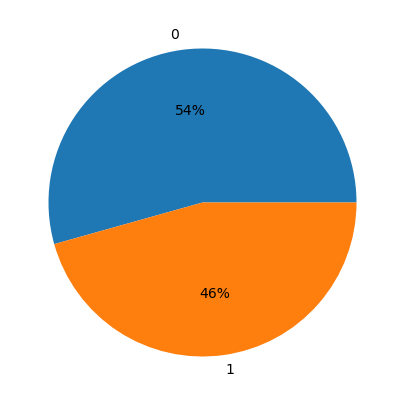

In [263]:
data_bar.query('(RestaurantLessThan20 in ["4~8","gt8"]) and (income in ["$25000 - $37499","$12500 - $24999","$37500 - $49999", "Less than $12500"] )').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

<Axes: >

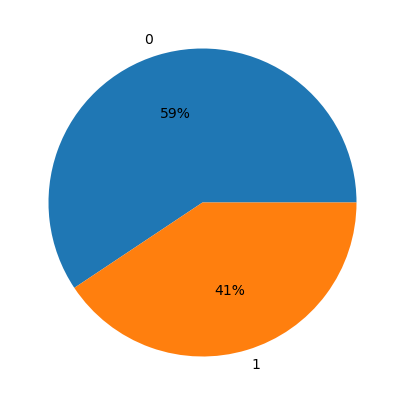

In [264]:
data_bar.query('(RestaurantLessThan20 in ["4~8","gt8"]) and (income not in ["$25000 - $37499","$12500 - $24999","$37500 - $49999", "Less than $12500"] )').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

<Axes: >

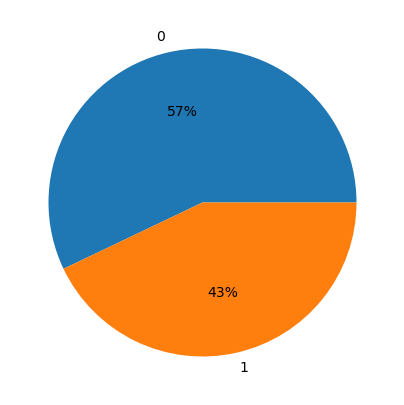

In [265]:
data_bar.query('(RestaurantLessThan20 in ["4~8","gt8"])  ').groupby('Y').size().plot.pie(autopct = '%1.0f%%', figsize = (5,5))

Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Findings for Bar coupon:
 - Overall coupon acceptance rate is lower than non-acceptance rate (41% vs 59%)
 - However, for those who went to Bar more than once a month, the acceptance rate is significantly higher (69% vs 31%), and with further analysis for those who went to bar more than 4 times a month , we found the more request they went, the higher the acceptance rate we can see.
 - Passenger with no Kids is another factor for a higher acceptance rate, which is reasonable because most of bars has age limitation
 - Drivers with age under 30 are more likely to accept coupon, i guess that is reasonable too because bars are more attractive to young people.
 - In summary, drivers who went to bar more than once a month, no kids passenger, age under 30 are more likely to accept the bar coupons. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  
 - Well, i would like to choose the Cheap restaurant (< 20) to take a look.


In [267]:
data_res = data[data['coupon'] == 'Restaurant(<20)']
data_res.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
29,No Urgent Place,Friends,Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
31,No Urgent Place,Friends,Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
42,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
44,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
51,No Urgent Place,Friends,Sunny,80,2PM,Restaurant(<20),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
53,No Urgent Place,Friends,Sunny,80,6PM,Restaurant(<20),2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
64,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
66,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
71,No Urgent Place,Friends,Sunny,80,6PM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


<Axes: >

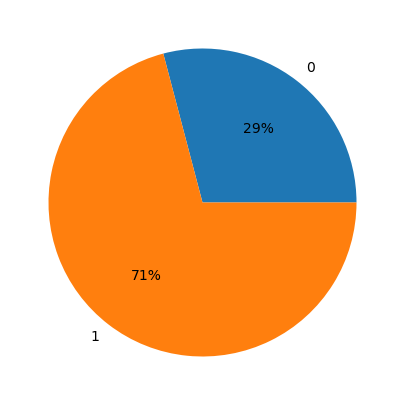

In [269]:
## Overall acceptance rate for Cheap restaurant coupon

data_res.groupby('Y').size().plot.pie(autopct = '%.0f%%', figsize = (5,5))

<Axes: >

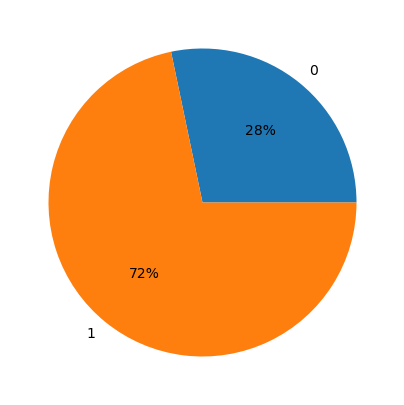

In [275]:
data_res.query('(RestaurantLessThan20 in ["1~3","4~8", "gt8"]) ').groupby('Y').size().plot.pie(autopct = '%.0f%%', figsize = (5,5))

<Axes: >

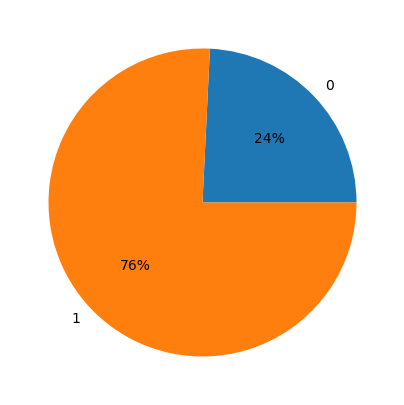

In [279]:
data_res.query(' (RestaurantLessThan20 in ["1~3","4~8", "gt8"]) and (age not in @above25) ').groupby('Y').size().plot.pie(autopct = '%.0f%%', figsize = (5,5))

<Axes: >

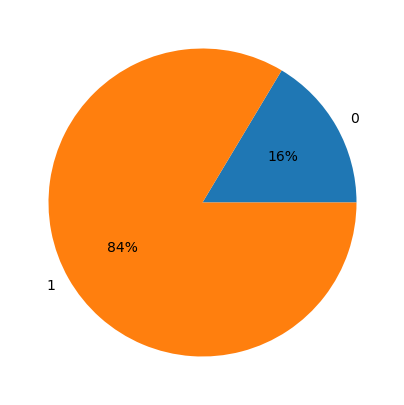

In [272]:
data_res.query('expiration not in ["2h"]').groupby('Y').size().plot.pie(autopct = '%.0f%%', figsize = (5,5))

Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Findings for Restaurant(<20) coupon:
- Overall coupon acceptance rate is higher than non-acceptance rate (71% vs 29%), which is not like the bar coupons, and we can see a potential business opportunity already. 
- After breakdown, we can see drivers who went to cheap restaurant more than once and age under 25 have even higher acceptance rate (76%)
- If we only look at longer-term coupon (except the 2h immediate coupon), we found the acceptance rate is super high (84% vs 16%)
- In summary, overall drivers are already easy to accept cheap restaurant coupons and those who went to cheap restaurant once a month, age under 25 are even more likely to accept coupon, especially the longer-term coupon.

#### Next Step and Recommandations:
- Distribute Cheap restaurant coupons for general targeting. For 2h expiration immediate coupons (maybe a deeper discount than 1d/2d expiration coupons), distribute them only during the non-mealtime to increase the traffic. 
- Distribute Bar coupons for precise targeting (who went to bar at least once a month, age under 30 and no kids onboard).
- If possible, do a break-even analysis to see if the discount loss could be compensated by the increase of traffic. 